<b> They are a set of Kernels that can achieve a variety of effects like Reducing the noise in an image , etc <b>

In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [53]:
def load_image():
    image = np.zeros((400,600),dtype=np.uint8)
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(image,text="ABCDE",org=(20,200),fontFace=font,fontScale=4,color=(255,255,255),thickness=5)
    return image

In [54]:
def disp_image(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

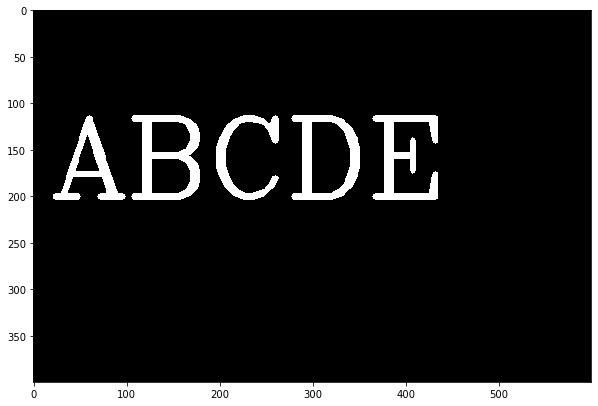

In [55]:
img = load_image()
disp_image(img)

## Erosion

In [71]:
kernel = np.ones((3,3),dtype = np.uint8)

In [72]:
res = cv2.erode(img,kernel,iterations=2)

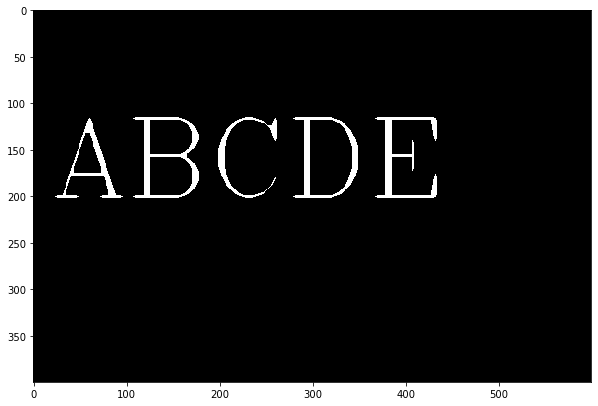

In [73]:
disp_image(res)

## Opening

**Erosion followed by Dilution**

In [85]:
# Adding noise to the image

white_noise = np.random.randint(low=0,high=2,size=(400,600),dtype=np.uint8)


In [86]:
white_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1]], dtype=uint8)

In [103]:
white_noise = white_noise * 255
white_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1]], dtype=uint8)

In [100]:
noise_img = white_noise+img
noise_img

array([[  0,   0,   0, ...,   0, 255,   0],
       [  0,   0, 255, ...,   0, 255, 255],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [255, 255,   0, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0,   0, 255],
       [255,   0, 255, ...,   0, 255, 255]], dtype=uint8)

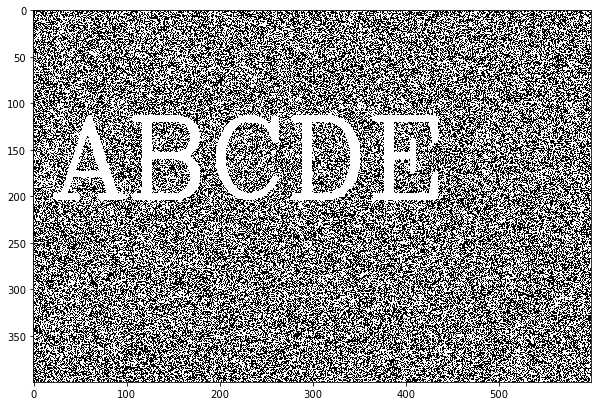

In [89]:
disp_image(noise_img)

In [91]:
# Reducing the noise in the image

opening = cv2.morphologyEx(
    noise_img,cv2.MORPH_OPEN,kernel
)

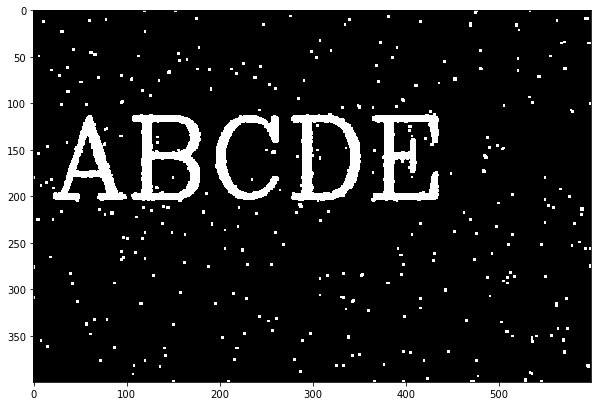

In [92]:
disp_image(opening)

## Closing

**Used For the reduction of forground noise**

In [93]:
black_noise = np.random.randint(low=0,high=2,size=(400,600),dtype=np.uint8)


In [94]:
black_noise

array([[1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=uint8)

In [95]:
black_noise = black_noise * -255

In [96]:
black_noise_img = black_noise + img
black_noise_img[black_noise_img == -255] = 0

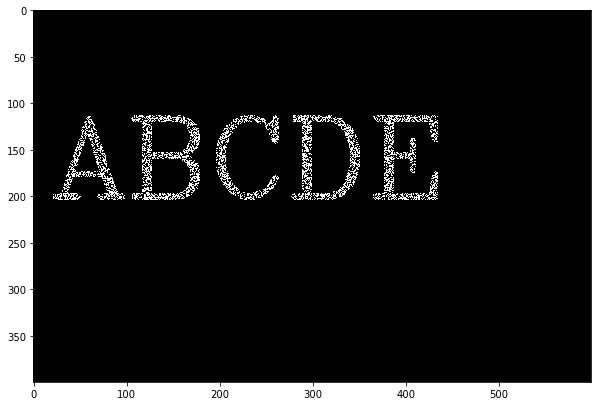

In [97]:
disp_image(black_noise_img)

In [104]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

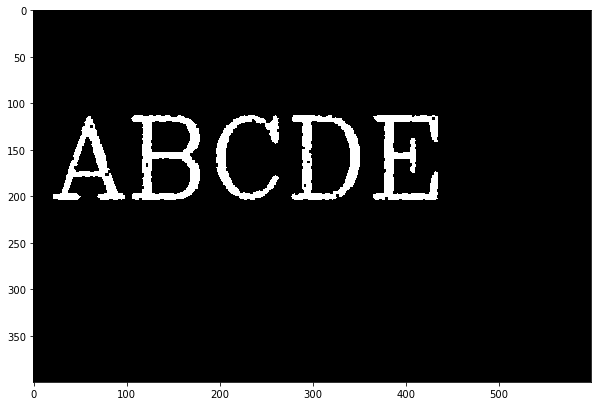

In [105]:
disp_image(closing)

## Gradient

In [106]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)


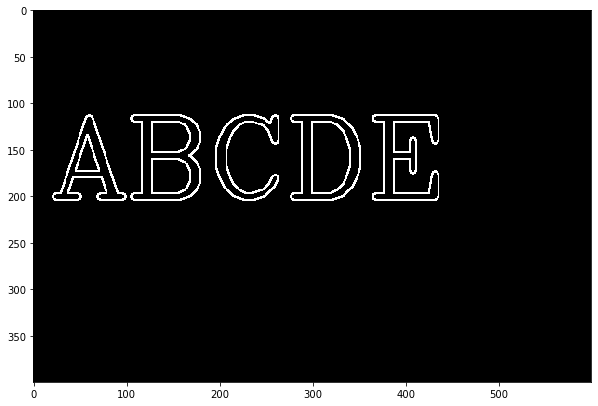

In [107]:
disp_image(gradient)